### Synthetic data

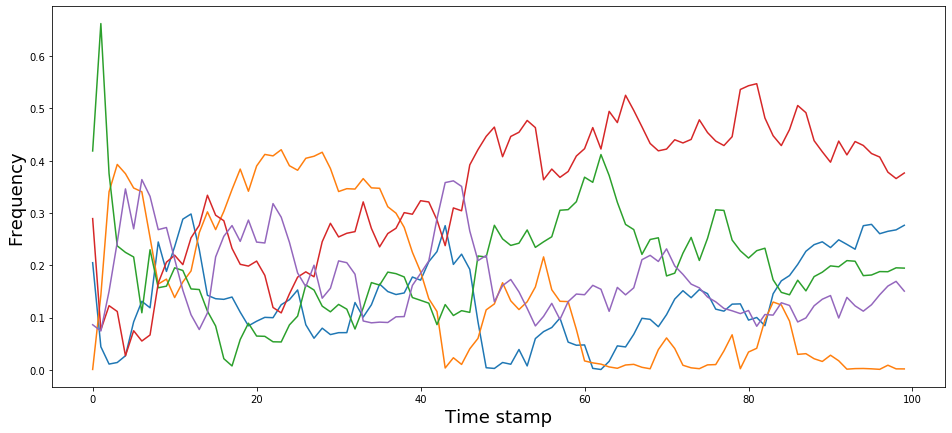

In [202]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt

# Set seed
np.random.seed(123)

# Set number of topics, words per topic and time points
topics = 5
word_topic = 25
T = 100

# Initialize time series and first time step using dirichlet
time_series = np.zeros((T,topics))
time_series[0,:] = np.random.dirichlet(np.array([0.2,0.2,0.3,0.5,0.4]))

# Fill remaining time points
for i in range(1,T):
    
    # Use previous time stamp to create new one
    tmp = np.random.normal(loc = time_series[i-1,:], scale=1)
    
    # Make sure no negative values
    if tmp.min() < 0:
        tmp+= np.random.uniform(-1.2*tmp.min(),-1.5*tmp.min())
        
    # Append new time stamp
    time_series[i,:] = tmp

# Normalizae time series
time_series = time_series / time_series.sum(axis=1).reshape(-1,1)

# Visualize the time series
plt.figure(figsize = (16,7))
plt.plot(time_series)
plt.xlabel("Time stamp", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)
plt.show()

In [206]:
# Initialize matrix
word_prob = np.zeros((word_topic*topics,5))

# Fill out probabilities
for i in range(topics):
    word_prob[i*word_topic:(i+1)*word_topic,i] = np.random.uniform(0.7,0.9,word_topic)
    
word_prob

array([[0.76940503, 0.        , 0.        , 0.        , 0.        ],
       [0.77821916, 0.        , 0.        , 0.        , 0.        ],
       [0.76210175, 0.        , 0.        , 0.        , 0.        ],
       [0.77743904, 0.        , 0.        , 0.        , 0.        ],
       [0.81117192, 0.        , 0.        , 0.        , 0.        ],
       [0.70282876, 0.        , 0.        , 0.        , 0.        ],
       [0.8695294 , 0.        , 0.        , 0.        , 0.        ],
       [0.88438397, 0.        , 0.        , 0.        , 0.        ],
       [0.81010594, 0.        , 0.        , 0.        , 0.        ],
       [0.75360422, 0.        , 0.        , 0.        , 0.        ],
       [0.8980478 , 0.        , 0.        , 0.        , 0.        ],
       [0.77663881, 0.        , 0.        , 0.        , 0.        ],
       [0.83873108, 0.        , 0.        , 0.        , 0.        ],
       [0.83799051, 0.        , 0.        , 0.        , 0.        ],
       [0.78686181, 0.        , 0.

In [181]:
word_prod = np.zeros((100,5))
for i in range(topics):
    word_prod[i*20:(i+1)*20,i] = np.random.uniform(0.7,0.9,20)
    
for i in range(100):
    if i < 20:
        diff = (1-word_prod[0:20, 0]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([1, 1, 1, 1]), size = 20) * diff
        
        word_prod[0:20, 1] = fill[:, 0]
        word_prod[0:20, 2] = fill[:, 1]
        word_prod[0:20, 3] = fill[:, 2]
        word_prod[0:20, 4] = fill[:, 3]
    
    if i > 20 and i < 40:
        diff = (1-word_prod[20:40, 1]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([1, 1, 1, 1]), size = 20) * diff
        
        word_prod[20:40, 0] = fill[:, 0]
        word_prod[20:40, 2] = fill[:, 1]
        word_prod[20:40, 3] = fill[:, 2]
        word_prod[20:40, 4] = fill[:, 3]
        
    if i > 40 and i < 60:
        diff = (1-word_prod[40:60, 2]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([1, 1, 1, 1]), size = 20) * diff
        
        word_prod[40:60, 0] = fill[:, 0]
        word_prod[40:60, 1] = fill[:, 1]
        word_prod[40:60, 3] = fill[:, 2]
        word_prod[40:60, 4] = fill[:, 3]
        
    if i > 60 and i < 80:
        diff = (1-word_prod[60:80, 3]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([1, 1, 1, 1]), size = 20) * diff
        
        word_prod[60:80, 0] = fill[:, 0]
        word_prod[60:80, 1] = fill[:, 1]
        word_prod[60:80, 2] = fill[:, 2]
        word_prod[60:80, 4] = fill[:, 3]
        
    if i > 80:
        diff = (1-word_prod[80:100, 4]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([1, 1, 1, 1]), size = 20) * diff
        
        word_prod[80:100, 0] = fill[:, 0]
        word_prod[80:100, 1] = fill[:, 1]
        word_prod[80:100, 2] = fill[:, 2]
        word_prod[80:100, 3] = fill[:, 3]
        

print("We are sorry about this horific for loop")

docs_time = np.asarray([np.random.choice(a = [0,1,2,3,4], p = ts, size = 25) for ts in time_series]).ravel()
bow = np.asarray([np.random.choice(a = np.arange(100), p = word_prod[:,doc]/np.sum(word_prod[:,doc]), size = 10) for doc in docs_time])
bow.shape

In [185]:
np.save("fakedata.npy", bow)